In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [5]:
site = "C"

In [6]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 26 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ts                             1106805 non-null  object 
 1   instanceID                     1106805 non-null  object 
 2   AoARel                         1096216 non-null  float64
 3   bladePitch                     1096391 non-null  float64
 4   bladePitchMax                  1096391 non-null  float64
 5   bladePitchMin                  1096391 non-null  float64
 6   bladePitchSetPoint             0 non-null        float64
 7   bladePitchStd                  0 non-null        float64
 8   cP                             1095614 non-null  float64
 9   generatorTorque                1071742 non-null  float64
 10  rotorTorque                    1047007 non-null  float64
 11  TI                             1095593 non-null  float64
 12  TSR           

In [8]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106805 entries, 0 to 1106804
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ts          1106805 non-null  object
 1   instanceID  1106805 non-null  object
 2   value       1106805 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 25.3+ MB


In [10]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

21
['C_WTG01' 'C_WTG02' 'C_WTG03' 'C_WTG04' 'C_WTG05' 'C_WTG06' 'C_WTG07'
 'C_WTG08' 'C_WTG09' 'C_WTG10' 'C_WTG11' 'C_WTG12' 'C_WTG13' 'C_WTG14'
 'C_WTG15' 'C_WTG16' 'C_WTG17' 'C_WTG18' 'C_WTG19' 'C_WTG20' 'C_WTG21']


**Comment:** data size: 1106805 x 26; flag size: 1106805 x 3. There are 21 turbines. 366 x 21 x 24 x 6 + 21 = 1106805. No missing rows.

In [ ]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [13]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [14]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [16]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [17]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
258497,2020-03-26 11:30:00,3,26,11,C_WTG09,2.089356,0.370469,17.731258,8.920000,-1.947986,0
860845,2020-10-11 16:00:00,10,11,16,C_WTG14,2.626837,0.466763,17.769033,9.720000,1.710527,0
731106,2020-08-29 18:20:00,8,29,18,C_WTG13,7.082959,0.705398,9.959088,12.198333,781.059869,1
1087165,2020-12-25 12:10:00,12,25,12,C_WTG17,6.239500,0.972592,15.587659,5.190000,678.849797,1
840919,2020-10-05 01:50:00,10,5,1,C_WTG17,3.014098,0.494606,16.409767,12.191666,15.545936,0


### Plot time series

In [18]:
data_01 = data[data['instanceID'] == site + '_WTG01']

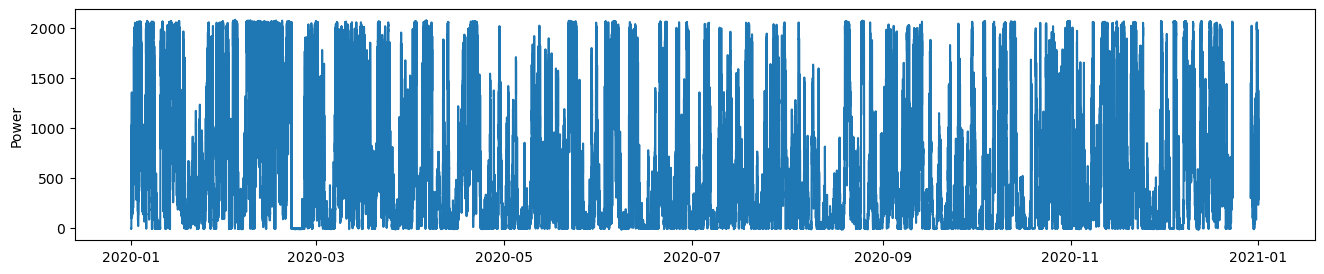

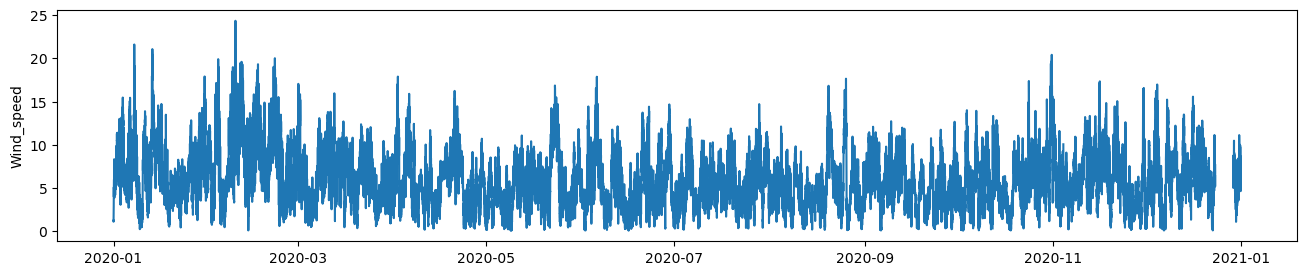

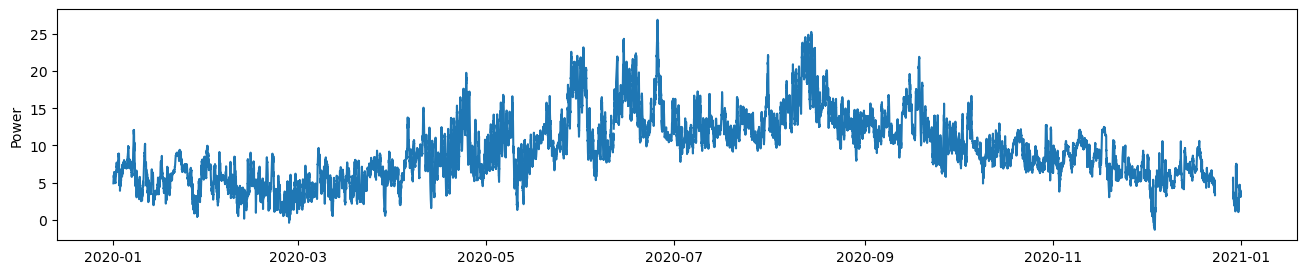

In [19]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Power')
plt.show()

### Full performance data

In [20]:
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][7:] for i in range (len(instanceID))] 

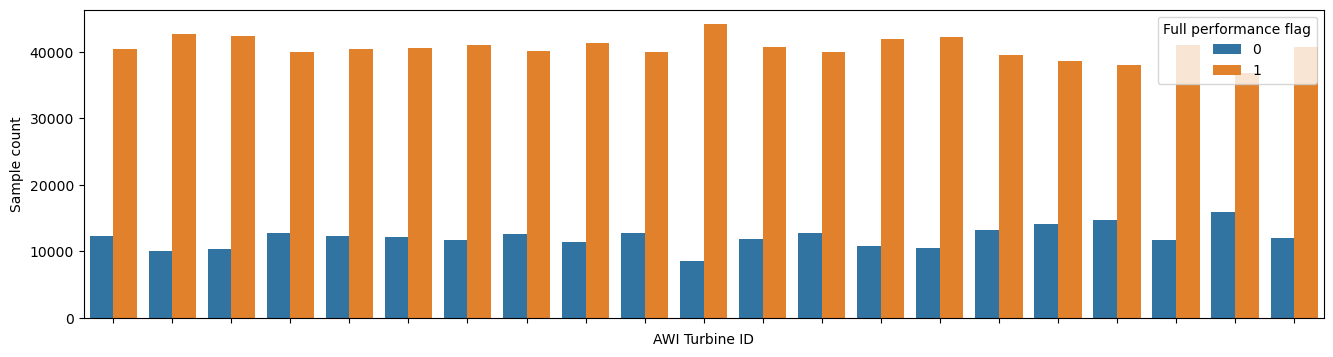

In [21]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (16,4))
ax = sns.barplot(y="ts", x="instanceID", hue = "value", data=bar, orient = "v", order = instanceID)
ax.legend(title="Full performance flag")
plt.ylabel("Sample count")
plt.xlabel("AWI Turbine ID")
ax.set_xticklabels(ID)
plt.show()

In [22]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [23]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,852507.000000,852507.000000,852507.000000,852507.000000,852507.000000,852507.000000,852507.000000,852507.000000
mean,6.402827,15.622444,11.683558,6.691030,1.017029,15.645415,8.995409,774.865763
std,3.486600,8.727495,6.888871,2.690957,0.478822,5.136609,4.202607,667.871798
min,1.000000,1.000000,0.000000,1.721722,0.000000,0.000000,-1.103333,2.002835
25%,3.000000,8.000000,6.000000,4.622216,0.672737,11.942906,5.901667,198.210767
50%,6.000000,16.000000,12.000000,6.173430,0.929968,15.092592,8.515000,541.369928
75%,9.000000,23.000000,18.000000,8.291731,1.257649,18.733738,11.741667,1294.724225
max,12.000000,31.000000,23.000000,22.793514,5.739471,155.963232,28.031667,2080.103027


In [24]:
data_clean[data_clean['TI'] >= 100]

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
1095409,2020-12-28 05:40:00,12,28,5,C_WTG08,2.027793,3.162611,155.963232,3.746667,11.309656


In [25]:
# remove extreme TI values
data_clean = data_clean[data_clean['TI'] <= 100]

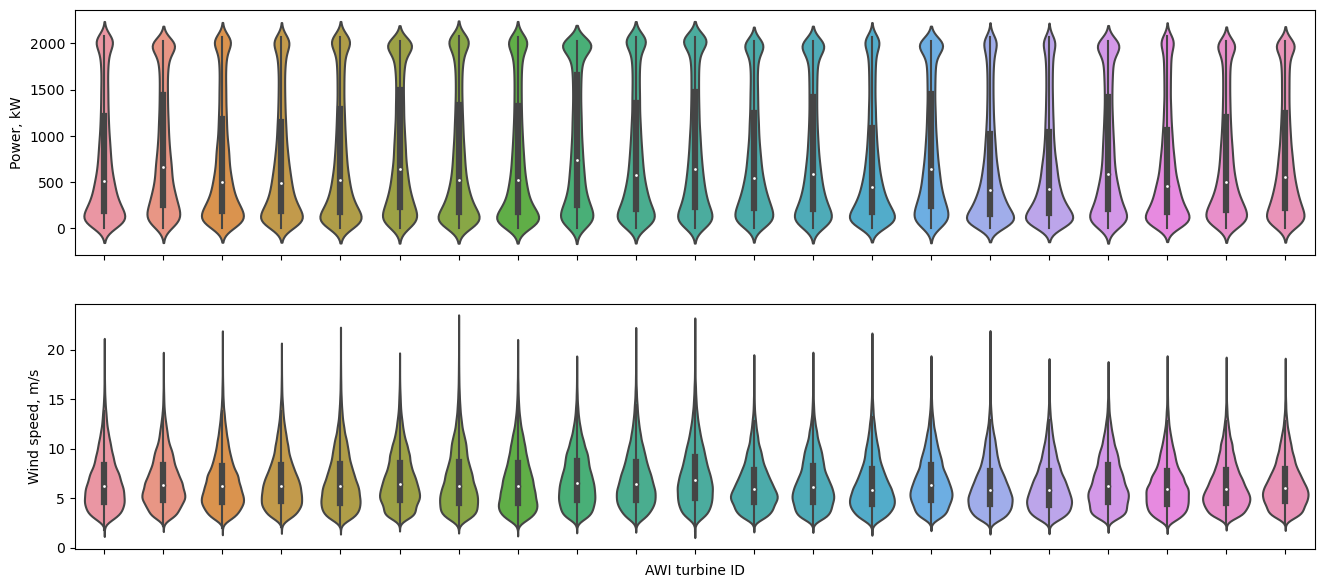

In [26]:
# Make boxplot
fig, ax = plt.subplots(2, figsize = (16, 7))

features = [ 'Power','Wind_speed']
features_name = [ 'Power, kW','Wind speed, m/s']

for i in range (0,2):
    sns.violinplot( data = data_clean, y = features[i], x = 'instanceID', orient = 'v', ax = ax[i], order = instanceID)
    ax[i].set(ylabel = features_name[i], xlabel = 'AWI turbine ID')
    ax[i].set_xticklabels(ID)
    if i == 0: 
        ax[i].set(xlabel=None)

plt.show()

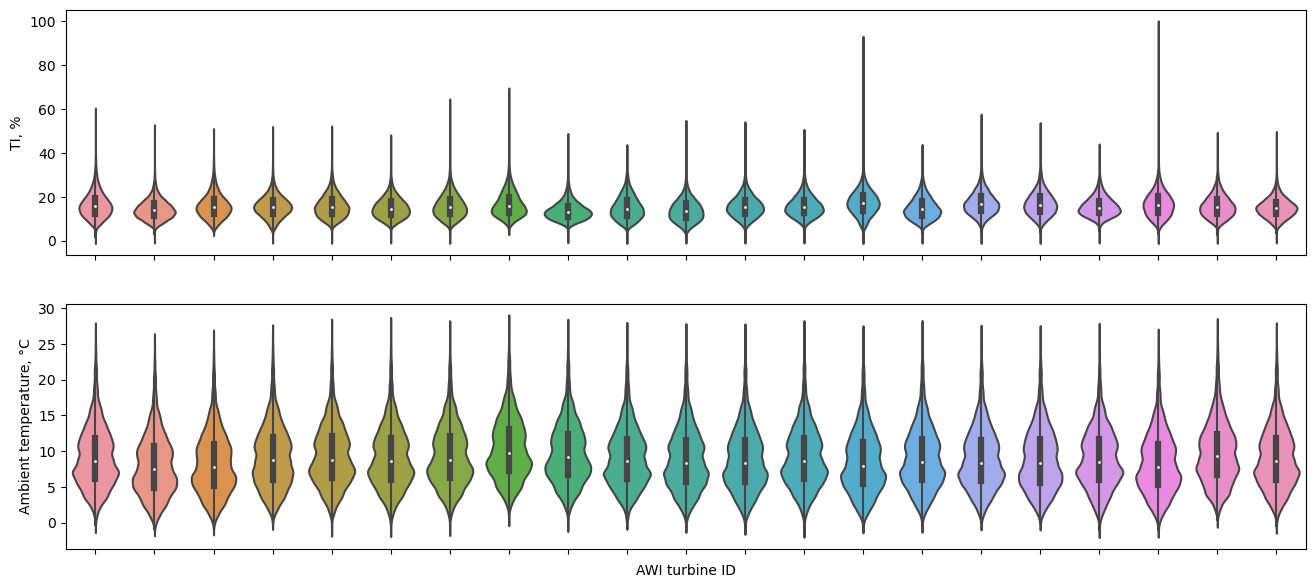

In [27]:
# Make boxplot
fig, ax = plt.subplots(2, figsize = (16, 7))

features = [ 'TI','Temperature']
features_name = [ 'TI, %','Ambient temperature, °C']

for i in range (0,2):
    sns.violinplot( data = data_clean, y = features[i], x = 'instanceID', orient = 'v', ax = ax[i], order = instanceID)
    ax[i].set(ylabel = features_name[i], xlabel = 'AWI turbine ID')
    ax[i].set_xticklabels(ID)
    if i == 0: 
        ax[i].set(xlabel=None)
#         ax[i].set_ylim([0, 100])

plt.show()

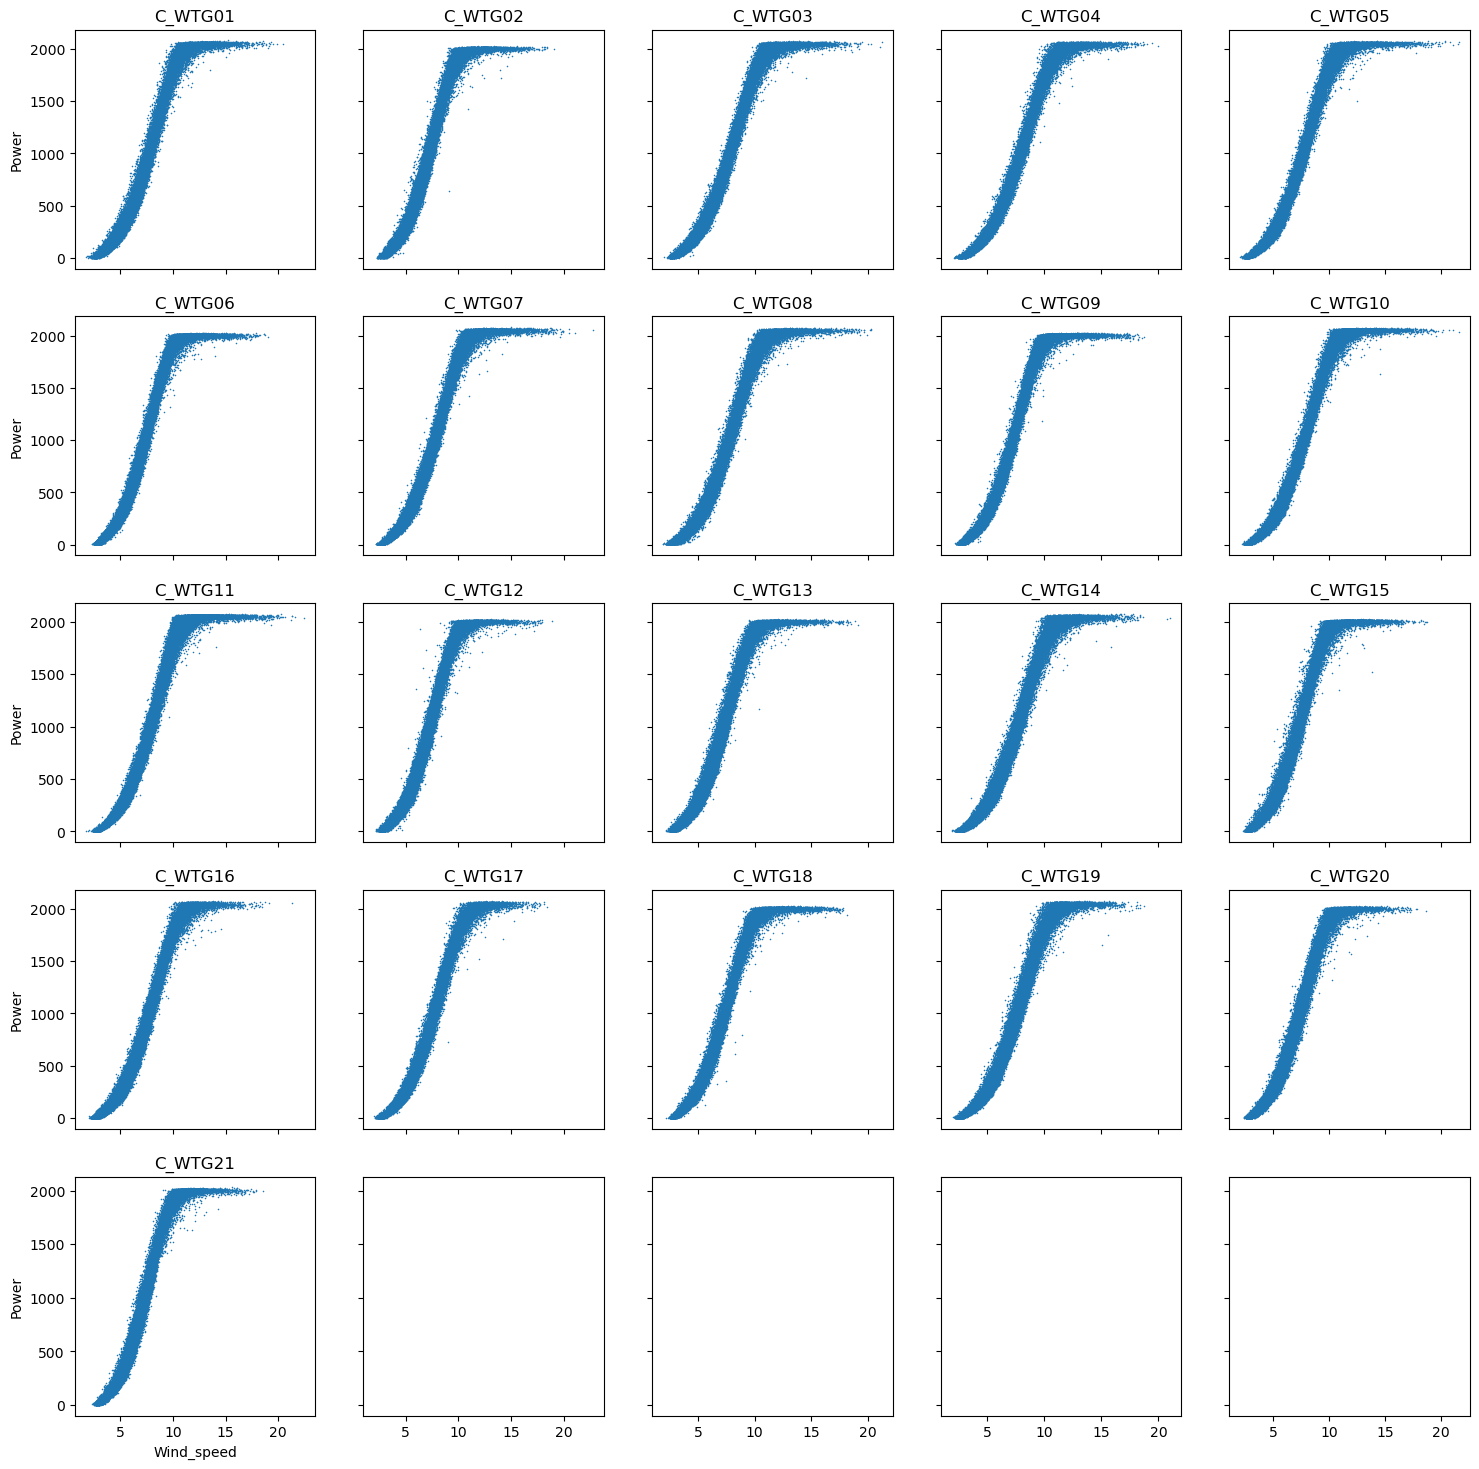

In [28]:
# Plot power curve for each turbine
fig, ax = plt.subplots(5,5, figsize=(18,18), sharex='col', sharey='row');

i = 0
for r in range (5):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1
            if i >= turbine_count:
                break
plt.show()

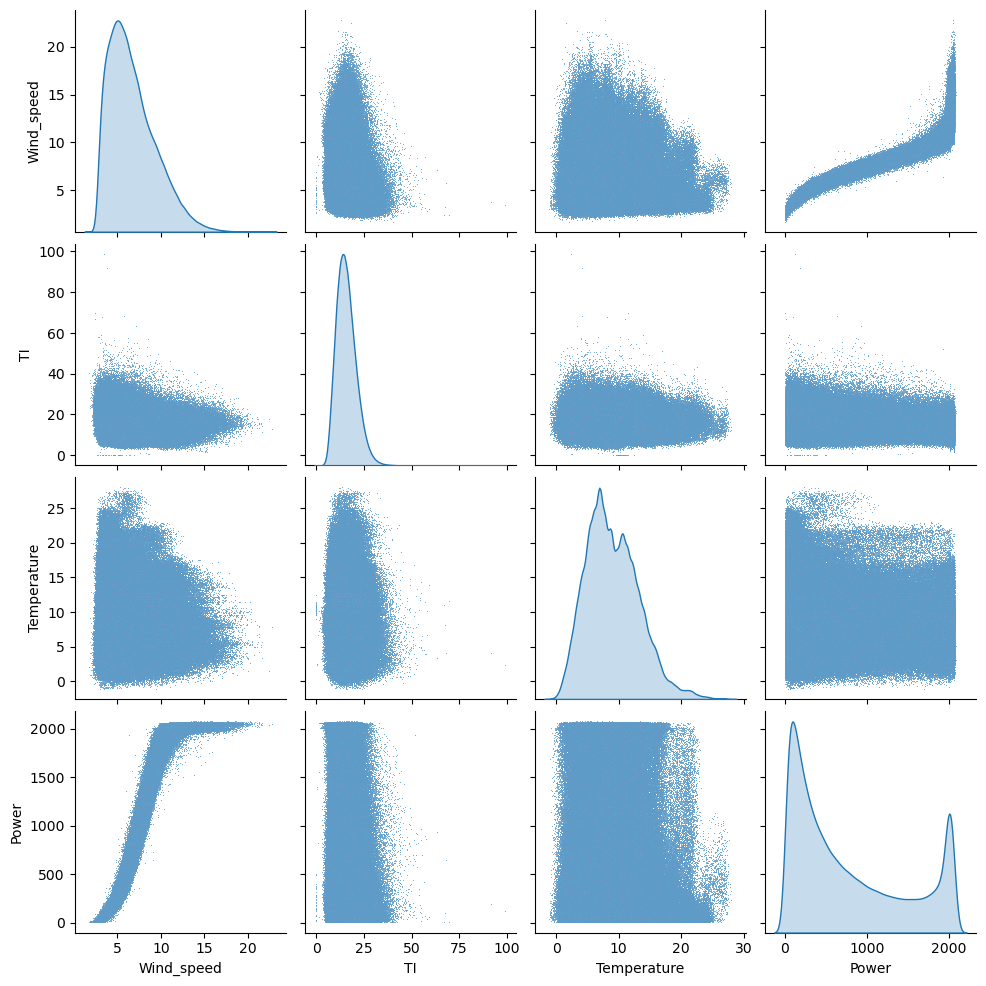

In [29]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

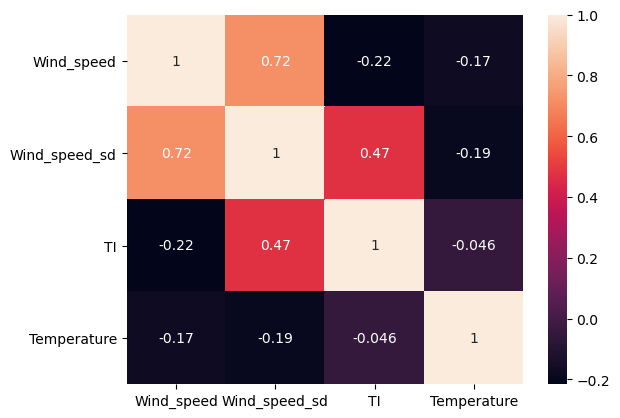

In [30]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

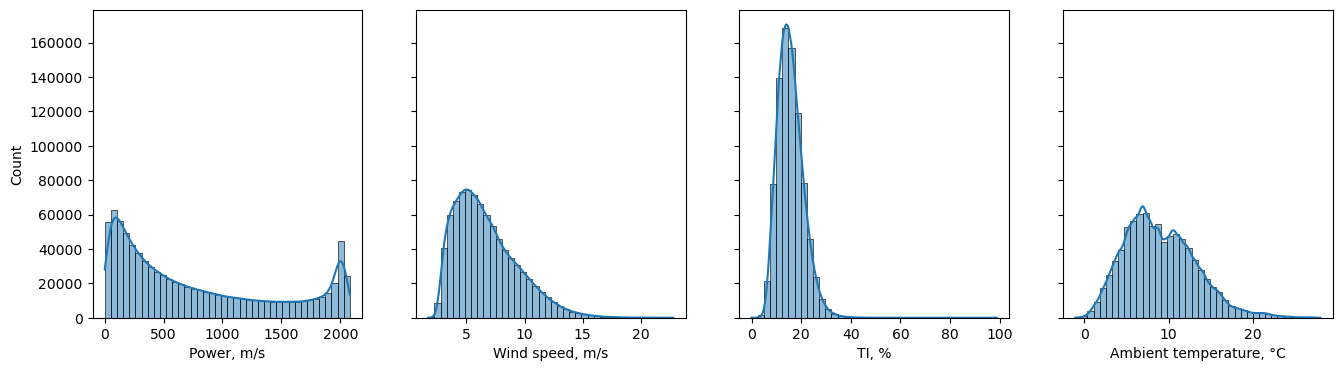

Wall time: 21.7 s


In [31]:
%%time 

features = ["Power", "Wind_speed", "TI", "Temperature"]
features_name = ["Power, m/s", "Wind speed, m/s", "TI, %", "Ambient temperature, °C"]

fig, ax = plt.subplots(1,4, figsize=(16,4), sharey='row')

for c in range(4):
    sns.histplot(data_clean[features[c]], kde = True , bins = 40, ax = ax[c])
    ax[c].set_xlabel(features_name[c]) 

plt.show()

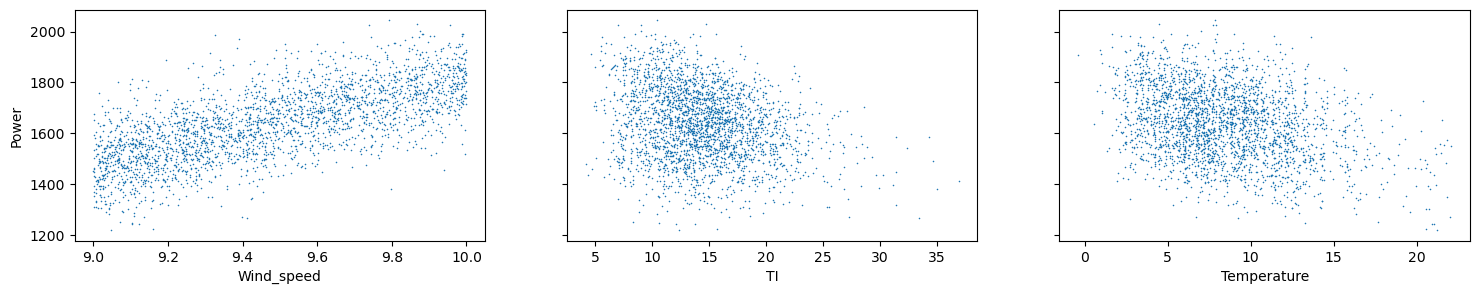

In [33]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTG01") & (data_clean['Wind_speed'] >= 9) 
                           & (data_clean['Wind_speed'] <= 10)] 

features = ["Wind_speed", "TI", "Temperature"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

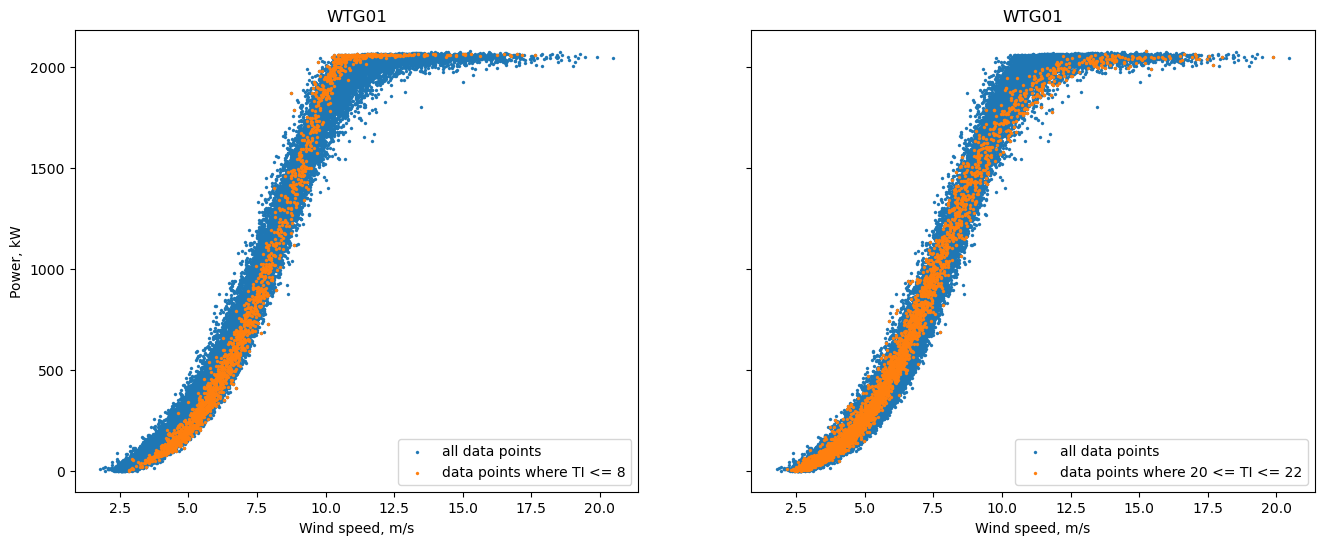

In [40]:
# Plot power curve of difference TI range
WTG01 = data_clean[(data_clean['instanceID'] == 'AWI_WTG01')]
WTG01_a = WTG01[(WTG01['TI'] >= 20) & (WTG01['TI'] <= 22)] 
WTG01_b = WTG01[(WTG01['TI'] <= 8)] 

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey='row')

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[0], s = 5, label = 'all data points', edgecolor = None)
sns.scatterplot(x = WTG01_b['Wind_speed'], y = WTG01_b['Power'], ax = ax[0], s = 5, label = 'data points where TI <= 8', edgecolor = None)
ax[0].set_xlabel('Wind speed, m/s') 
ax[0].set_ylabel("Power, kW") 
ax[1].set_title("WTG01") 

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[1], s = 5, label = 'all data points', edgecolor = None)
sns.scatterplot(x = WTG01_a['Wind_speed'], y = WTG01_a['Power'], ax = ax[1], s = 5 , label = 'data points where 20 <= TI <= 22', edgecolor = None)
ax[1].set_xlabel('Wind speed, m/s') 
ax[1].set_ylabel("Power, kW") 
ax[0].set_title("WTG01") 

plt.show()

### Export data

In [34]:
# data_clean.to_csv("C://Users//User//Desktop//Wind turbine performance monitoring//Data_clean//" + site + "_data_clean.csv")